# LSE Machine Learning: Practical Applications
## Module 5 Unit 1 IDE Activity (Assessment)
### In this IDE notebook, you are required to complete different steps to execute logistic regression on the given data set in R.
The instructions for this IDE activity are positioned as text cells before each step. You are required to read the text cells above a code cell, familiarise yourself with the required step, and execute the step. You are encouraged to refer back to the practice IDE activity to familiarise yourself with the different steps and how they are executed in R.

1. Load the following packages: `tidyverse`, `margins`, and `ISLR`.

In [1]:
library(tidyverse)
library(margins)
library(ISLR)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



2. To execute logistic regression, load the stock market data set from the `ISLR` library.

In [2]:
data(Smarket)
data <- Smarket

3. Once the data set is loaded into R, use the `str` function to analyse the structure of the data frame. Use the `head` function to consider the first few rows of the data.

In [3]:
str(data)
head(data)

'data.frame':	1250 obs. of  9 variables:
 $ Year     : num  2001 2001 2001 2001 2001 ...
 $ Lag1     : num  0.381 0.959 1.032 -0.623 0.614 ...
 $ Lag2     : num  -0.192 0.381 0.959 1.032 -0.623 ...
 $ Lag3     : num  -2.624 -0.192 0.381 0.959 1.032 ...
 $ Lag4     : num  -1.055 -2.624 -0.192 0.381 0.959 ...
 $ Lag5     : num  5.01 -1.055 -2.624 -0.192 0.381 ...
 $ Volume   : num  1.19 1.3 1.41 1.28 1.21 ...
 $ Today    : num  0.959 1.032 -0.623 0.614 0.213 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 2 2 1 2 2 2 1 2 2 2 ...


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
6,2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up


**Note:** The direction variable is already a factor and no further transformation is required. Once the data is ready, the logistic regression model can be fitted onto the data set. In this example, the direction variable is the dependent variable, and all the other variables are independent variables.

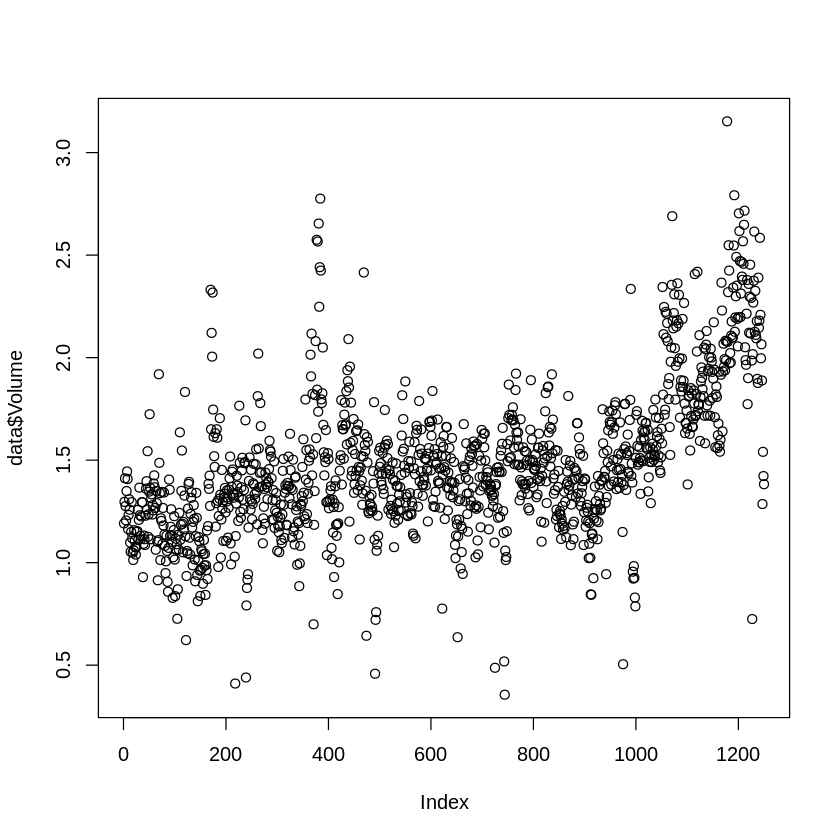

In [4]:
# Plot the traded volumes over time
plot(data$Volume)

4. Review the density distribution of the remaining variables broken down by the distribution value.

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




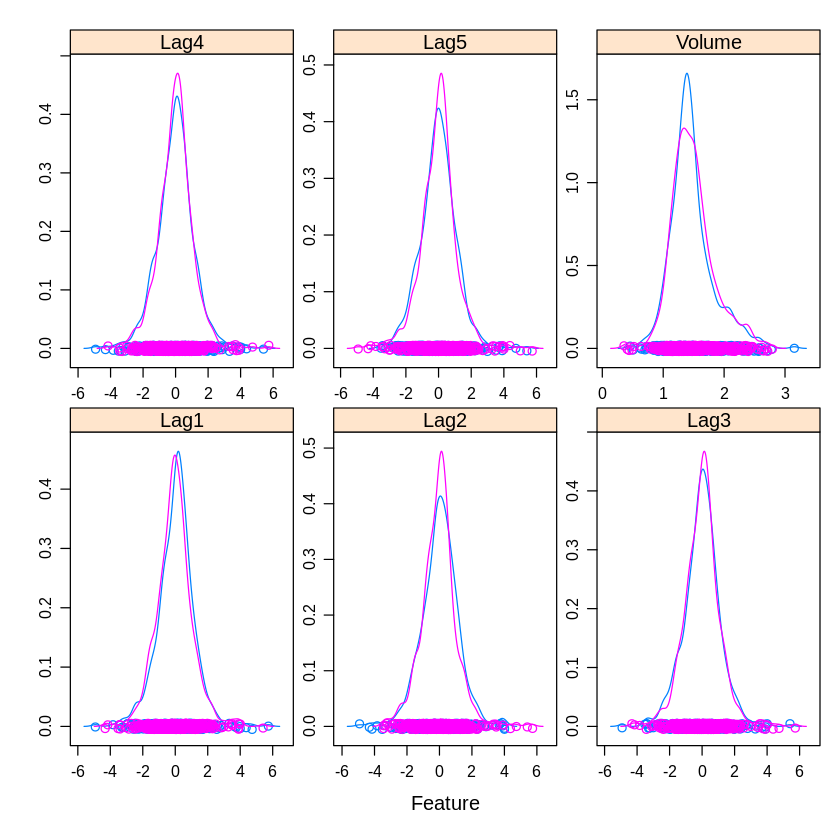

In [5]:
library(caret)
x <- data[,2:7]
y <- data[,9]
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

5. Use the `glm` function to estimate the logistic regression model. Use the following guidelines to execute this task:

-Build a model called "logitReg".

-Predict the direction based on Lag1 to Lag5, and include volume.

-Use family = binomial.

In [6]:
logitReg<- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,
               data=data, 
               family = binomial(link=logit))


6. Plot the summary of the model using the `summary` function.

In [7]:
summary(logitReg)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial(link = logit), data = data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


7. Using the `margins` function, determine the relationship between the variables.
**Note:** Use the same model from the previous steps. You are required to use the parameter for maximum iterations to ensure that the model converges.

In [19]:
summary(margins(logitReg, iterations=1000))

,factor,AME,SE,z,p,lower,upper
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Lag1,-0.018191424,0.01244678,-1.4615369,0.1438682,-0.04258666,0.006203812
2,Lag2,-0.010530755,0.01245459,-0.8455323,0.3978137,-0.03494130,0.013879787
3,Lag3,0.002759595,0.01243102,0.2219925,0.8243197,-0.02160477,0.027123956
4,Lag4,0.002329871,0.01244017,0.1872861,0.8514363,-0.02205241,0.026712155
5,Lag5,0.002567398,0.01232483,0.2083110,0.8349861,-0.02158883,0.026723626
6,Volume,0.033717424,0.03937714,0.8562689,0.3918490,-0.04346036,0.110895207


,factor,AME,SE,z,p,lower,upper
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Lag1,-0.018191424,0.01244678,-1.4615369,0.1438682,-0.04258666,0.006203812
2,Lag2,-0.010530755,0.01245459,-0.8455323,0.3978137,-0.03494130,0.013879787
3,Lag3,0.002759595,0.01243102,0.2219925,0.8243197,-0.02160477,0.027123956
4,Lag4,0.002329871,0.01244017,0.1872861,0.8514363,-0.02205241,0.026712155
5,Lag5,0.002567398,0.01232483,0.2083110,0.8349861,-0.02158883,0.026723626
6,Volume,0.033717424,0.03937714,0.8562689,0.3918490,-0.04346036,0.110895207


8. Calculate the prediction.

In [12]:
# Predict the next five values
glm.probs <- predict(logitReg,type = "response")
glm.probs[1:5]


1         2         3         4         5 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812

9. Assign values of "up" and "down" based on the probabilities predicted.

In [13]:
# Assign values of "up" and "down" based on the probabilities predicted
glm.pred <- ifelse(glm.probs > 0.5, "Up", "Down")


#length(data$Direction)
#length(glm.pred)

10. Print the confusion matrix by using the `table` function.

In [15]:
# Print confusion matrix
# YOUR CODE HERE
expected_value<-data$Direction
predicted_value<-glm.pred
table(expected_value,predicted_value)


              predicted_value
expected_value Down  Up
          Down  145 457
          Up    141 507

11. Print the error rate by using the `mean` function.

In [16]:
# Print the error rate
mean(glm.pred != data$Direction)


[1] 0.4784

**Pause and reflect:**

Think back to what you've learnt in previous modules about the error rate, and how the error rate relates to logistic regression. What does this error rate mean in this specific example?

12. Predict the expected direction based on the parameters provided below. You are required to use the following specified values to predict the direction of the stock market:

-Lag1 = 0.5

-Lag2 = –0.5

-Lag3 = –5

-Lag4 = –1

-Lag5 = 1

-Volume = 5

In [17]:
newData <- data.frame(0.5, -0.5, -5, -1, 1, 5)
colnames(newData) <- c("Lag1", "Lag2", "Lag3","Lag4", "Lag5", "Volume")
predict(logitReg, newData, type = "response")


1 
0.6180655

**Note:** Remember to submit this notebook after completion and navigate to the next component to engage with your peers in the small group discussion forum.